In [1]:
import tensorflow as tf

# print('****************************************************')
# print(tf.__version__)
# print('****************************************************')

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [2]:
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_hub as hub

base_model = hub.KerasLayer("https://tfhub.dev/google/bit/m-r50x3/1", input_shape=(256,256,3))

model = keras.Sequential([
    # layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", input_shape=[256, 256, 3]),
    # layers.MaxPool2D(pool_size=4, strides=2, padding='valid'),
    # layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    # layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    # layers.Flatten(),
    base_model,
    # layers.Dense(units=256, activation='relu'),
    # layers.Dense(units=128, activation='relu'),
    layers.Dense(units=2, activation='softmax')
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 6144)              211174080 
_________________________________________________________________
dense (Dense)                (None, 2)                 12290     
Total params: 211,186,370
Trainable params: 12,290
Non-trainable params: 211,174,080
_________________________________________________________________


In [4]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    # loss = keras.losses.BinaryCrossentropy(),
    loss = keras.losses.SparseCategoricalCrossentropy(), # when use 2 neurons and softmax at output it seems to work better
    metrics=["accuracy"]
)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('CNN/train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('CNN/validation',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2228 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [6]:
history = model.fit(x=training_set, validation_data = validation_set, epochs=10, verbose=2)

Epoch 1/10
70/70 - 125s - loss: 0.1623 - accuracy: 0.9632 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 2/10
70/70 - 122s - loss: 0.0128 - accuracy: 0.9982 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 3/10
70/70 - 122s - loss: 0.0149 - accuracy: 0.9969 - val_loss: 5.3703e-04 - val_accuracy: 1.0000
Epoch 4/10
70/70 - 122s - loss: 0.0052 - accuracy: 0.9996 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 5/10
70/70 - 123s - loss: 0.0077 - accuracy: 0.9987 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 6/10
70/70 - 123s - loss: 0.0056 - accuracy: 0.9987 - val_loss: 0.0662 - val_accuracy: 0.9700
Epoch 7/10
70/70 - 123s - loss: 0.0049 - accuracy: 0.9987 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 8/10
70/70 - 123s - loss: 0.0029 - accuracy: 0.9987 - val_loss: 0.0206 - val_accuracy: 0.9900
Epoch 9/10
70/70 - 123s - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0864 - val_accuracy: 0.9700
Epoch 10/10
70/70 - 123s - loss: 0.0066 - accuracy: 0.9978 - val_loss: 0.0077 - val_accuracy: 1.

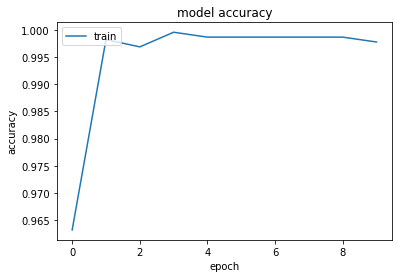

In [7]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.legend(['train'], loc='upper left')
plt.show()

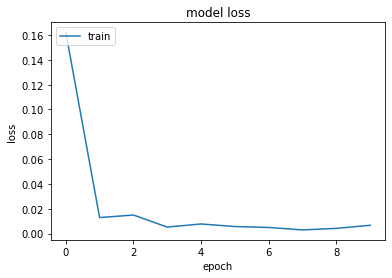

In [8]:
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.legend(['train'], loc='upper left')
plt.show()